# Primer and RE viewer

The goal of this notebook is to give someone the ability to look at whether any existing primers or restriction enzymes will amlpify or a cut input genomes.

In [1]:
# imports
from Bio.Seq import Seq
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open primers.
primer_structure = {"F" : [], "R" : []}

def get_primers(primer_csv):
    """
    parses a primer CSV to grab all primers.
    """
    primer_struct={}
    name_col = 0
    f_col, r_col = 1,2
    with open(primer_csv) as primer_csv:
        primer_csv = primer_csv.readlines()
        for index, primer in enumerate(primer_csv):
            primer = primer.split(",")
            name = primer[name_col]
            if (len(name) < 1) or (index == 0): continue # skip header and empty rows
            f_primer = primer[f_col]
            r_primer = primer[r_col]
            primer_struct[name] = (f_primer, r_primer)
            print((f_primer, r_primer))
            
    return primer_struct
    
primers = get_primers("primer_db.csv")

('GTCAATTTGCCTCCGTACGT', 'CCCGCCTCTCACTAGAAGTG')
('GCGGTGTAGACCCACATCTT', 'ACCGACGACGAGGTTATGTC')
('ATGGTTGCCTACGGACTGTC', 'CGAACGACTTGAAGGCTTTC')
('GATGGTTGCCTACGGACTGT', 'GAACGACTTGAAGGCTTTCG')
('CCACAGGTCAGAGGTGGTTT', 'GCCTTCAGCCTCAGTTTCAC')
('CGAAAACACATGTCCGACAC', 'CTCCGAAGACCTACGACGAG')
('CAAACTGCGCAACTCGTGAA', 'GACAGGCGAATCGCAATCAC')
('GGACAATTCGCACGATTCCG', 'GCAGCGCATGTCTTCTTAGC')
('TTCTGTGCCGCGTTTCTTTG', 'CCACTGCAACAACTGAACGG')


In [3]:
full_path = 'genomes/'
genome_paths = [#f"{full_path}/blessica.fa", 
#                 f"{full_path}/d29.fa",
#                 f"{full_path}/perseus.fa",
#                 f"{full_path}/abrogate.fa",
#                 f"{full_path}/semperfi.fa",
#                 f"{full_path}/meezee.fa",
#                 f"{full_path}/rockstar.fa",
#                 f"{full_path}/msmeg.fa",
#                 f"{full_path}/ecoli.fa",
                f"{full_path}/lambda.fa",
                f"{full_path}/t7.fa",
                f"{full_path}/phiX174.fa"]

# Primers

In [4]:
genome_index = 0
primer_index = 0
binding_array = np.zeros((len(genome_paths), len(primers.keys())))
for genome in genome_paths:
    print(genome)
    # Open genome.
    record = SeqIO.read(genome, "fasta")
    seq = record.seq
    # get rev compliment
    seq_comp = seq.reverse_complement()
    primer_index = 0
    for primer_name, primer_pairs in primers.items(): 
        f_primer, r_primer = primer_pairs
        #f_primer = Seq(f_primer).reverse_complement()
        F_pos = seq.find(f_primer)
        R_pos = seq.find(Seq(r_primer).reverse_complement())
        print(f"\t {primer_name}")
#         print(f"\t\t forward start: {F_pos}, back start: {R_pos}")
        if (F_pos != -1) and (R_pos != -1):
            binding_array[genome_index][primer_index] = 1
            print("\t\t HIT")
            print(f"\t\t length: {R_pos - (F_pos - len(f_primer))} bp")
            print(f"\t\t forward start: {F_pos}, back start: {R_pos}")
        primer_index += 1
    genome_index += 1

genomes//lambda.fa
	 Perseus_0
	 Perseus_1
	 Blessica_0
	 Blessica_1
	 D29_0
	 D29_1
	 Lambda
		 HIT
		 length: 822 bp
		 forward start: 27943, back start: 28745
	 phage
	 Escherichia phage phiX174
genomes//t7.fa
	 Perseus_0
	 Perseus_1
	 Blessica_0
	 Blessica_1
	 D29_0
	 D29_1
	 Lambda
	 phage
		 HIT
		 length: 570 bp
		 forward start: 11566, back start: 12116
	 Escherichia phage phiX174
genomes//phiX174.fa
	 Perseus_0
	 Perseus_1
	 Blessica_0
	 Blessica_1
	 D29_0
	 D29_1
	 Lambda
	 phage
	 Escherichia phage phiX174
		 HIT
		 length: 397 bp
		 forward start: 1812, back start: 2189


Text(0.5, 0, 'primer pair')

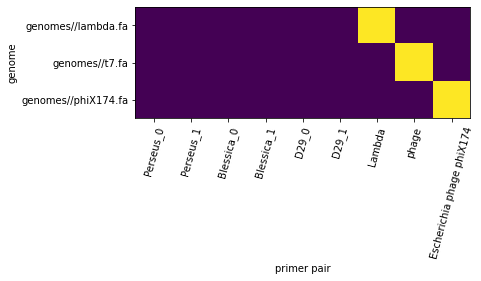

In [5]:
plt.imshow(binding_array)
plt.yticks(np.arange(len(genome_paths)), genome_paths)
plt.xticks(np.arange(len(primers.keys())), primers.keys(), rotation=75)
plt.ylabel("genome")
plt.xlabel("primer pair")

## Restriction Enzymes

In [6]:
def find_binding_regions(re_seq, genome):
    """
    Description:
        This method find forward and reverse regions for 
        RE binding.
    Input:
        1. RE site (str)
        2. genome sequence (str)
    Output:
        1. List of cut sites
    """
    # init structures
    cut_sites = []
    genome_f = list(genome)
    # find reverse sites
    for genome_index in range(0, len(genome_f) - len(re_seq)):
        genome_subseq_f = "".join(genome_f[genome_index:genome_index+len(re_seq)])
        if re_seq == genome_subseq_f: cut_sites.append(genome_index + 3)
    return cut_sites

In [7]:
re_db = {"BamHI": "GGATCC", 
         "EcoRI": "GAATTC", 
         "BSU15i" : "ATCGAT",
         "BSURi" : "GGCC" , 
         "Hind3" : "AAGCTT"}

for genome in genome_paths:
    print(genome)
    # Open genome.
    record = SeqIO.read(genome, "fasta")
    seq = record.seq
    for re_name, re_seq in re_db.items(): 
        cut_sites = find_binding_regions(re_seq, seq)
        print(f"\t {re_name}")
        print(f"\t\t cut sites: {cut_sites}")

genomes//lambda.fa
	 BamHI
		 cut sites: [5507, 22348, 27974, 34501, 41734]
	 EcoRI
		 cut sites: [21228, 26106, 31749, 39170, 44974]
	 BSU15i
		 cut sites: [4200, 15585, 16122, 26618, 30291, 31992, 32965, 33586, 34698, 35052, 36967, 41365, 42022, 43826, 46440]
	 BSURi
		 cut sites: [148, 405, 471, 783, 886, 1108, 1329, 1487, 1956, 2000, 2041, 2209, 2742, 2869, 3263, 3299, 3995, 4091, 4196, 4461, 4525, 4635, 5182, 5238, 5589, 5604, 6011, 6102, 6499, 6599, 6880, 7167, 7177, 7582, 7587, 7981, 8002, 8059, 8152, 8167, 8188, 8369, 8862, 9505, 9987, 10089, 10435, 10591, 10612, 10780, 10915, 11365, 11629, 12262, 12437, 12718, 13030, 13079, 13263, 13484, 13937, 14370, 14578, 14906, 15062, 15167, 15604, 15998, 16322, 16419, 16769, 17294, 17516, 17850, 17912, 18147, 18308, 18341, 18550, 19026, 19287, 19335, 19947, 20077, 20188, 20242, 20326, 20344, 20371, 20931, 20991, 21219, 21234, 21263, 21606, 22028, 22534, 26626, 28410, 28621, 28732, 28903, 31269, 31481, 31563, 31584, 31649, 31794, 31879, 32

In [9]:
genomes//lambda.fa
	 BamHI
		 cut sites: [5507, 22348, 27974, 34501, 41734]
	 BSU15i
		 cut sites: [4200, 15585, 16122, 26618, 30291, 31992, 32965, 33586, 34698, 35052, 36967, 41365, 42022, 43826, 46440]
	 BSURi
		 cut sites: [148, 405, 471, 783, 886, 1108, 1329, 1487, 1956, 2000, 2041, 2209, 2742, 2869, 3263, 3299, 3995, 4091, 4196, 4461, 4525, 4635, 5182, 5238, 5589, 5604, 6011, 6102, 6499, 6599, 6880, 7167, 7177, 7582, 7587, 7981, 8002, 8059, 8152, 8167, 8188, 8369, 8862, 9505, 9987, 10089, 10435, 10591, 10612, 10780, 10915, 11365, 11629, 12262, 12437, 12718, 13030, 13079, 13263, 13484, 13937, 14370, 14578, 14906, 15062, 15167, 15604, 15998, 16322, 16419, 16769, 17294, 17516, 17850, 17912, 18147, 18308, 18341, 18550, 19026, 19287, 19335, 19947, 20077, 20188, 20242, 20326, 20344, 20371, 20931, 20991, 21219, 21234, 21263, 21606, 22028, 22534, 26626, 28410, 28621, 28732, 28903, 31269, 31481, 31563, 31584, 31649, 31794, 31879, 32090, 32324, 32388, 32647, 32944, 33000, 33440, 33544, 33629, 34081, 34608, 35022, 35468, 35820, 36043, 36405, 36445, 36657, 36788, 37248, 38138, 38151, 39461, 39995, 40078, 40114, 40386, 40599, 40617, 40795, 40937, 43036, 43953, 44260, 45000, 45217, 45738, 46722, 47655, 48426]
genomes//t7.fa 
	BamHI
		 cut sites: []
    BSU15i
		 cut sites: [22858, 27101, 37081]
    BSURi
		 cut sites: [1462, 2772, 3132, 3283, 3601, 4408, 4745, 5881, 6442, 6792, 7119, 7367, 7580, 10310, 11297, 12793, 13378, 13443, 13886, 14990, 15279, 17071, 17247, 17673, 17817, 18217, 18334, 18459, 18557, 18759, 18784, 19022, 19557, 20566, 21717, 22165, 23481, 23836, 23950, 24017, 24092, 24182, 24964, 25862, 27798, 28425, 29436, 30492, 30589, 30782, 31563, 32714, 33430, 34961, 35541, 35933, 35942, 36153, 36741, 36834, 37759, 38039, 38298, 38316, 38380, 38805, 39683, 39723
genomes//phiX174.fa
	 BamHI
		 cut sites: []
	 BSU15i
		 cut sites: []
	 BSURi
		 cut sites: [436, 670, 980, 1174, 1777, 3130, 4208, 4489, 4760, 4878, 4950]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)